### (Weighted) moving average - simulated data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import datetime

import sys
from os.path import dirname, abspath
import os
sys.path.append(dirname(dirname(dirname(abspath('__file__'))))+'/utils')

from eval_testing import Testing
from read_answers import ReadAnswers
from forecast_methods import MovAverage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
## Input the filenames and parameters:
filename = 'basic_ts_sim_with_UE_02.pkl'
original_indices = 'orig_x.npy'
full_indices = 'full_time_index.npy'
interpolation_method = 'original'

In [7]:
## Create variables with directories to external files:
directory = os.path.join(dirname(dirname(os.getcwd())), 'data_files/')
file_data = os.path.join(directory, filename)
file_full_indices = os.path.join(directory, full_indices)
file_orig_indices = os.path.join(directory, original_indices)

In [8]:
## Import the measurements:
data_imported = pd.read_pickle(file_data)
data = data_imported['time-series with UE']

## Load and calculate x-axis index:
orig_x = np.load(file_orig_indices)
full_x = np.load(file_full_indices) 
indices = [int(i*365.25/11) for i in orig_x]

## Load the answers (ground truth):
ans = pd.DataFrame(data_imported['list of UE'], index = data_imported.index)
ans.columns = ['points']

for i in ans.points:
    for j in i:
        if j not in indices:
            i.remove(j)

In [50]:
data_imported

time-series       segm_lines  \
0     [0.0, 0.41710744309999764, 2.5265350772119506,...    [21, 78, 240]   
1     [0.0, 3.972137847289947, 9.436047967302281, -0...        [76, 273]   
2     [0.0, 3.962995893832899, -2.6317759549891355, ...    [44, 70, 230]   
3     [0.0, -1.6795600046398738, 0.9535782552538752,...        [93, 167]   
4     [0.0, 0.43703564600972655, 1.8908661405636247,...               []   
5     [0.0, -1.8096692069564742, 10.395423070749285,...    [21, 97, 132]   
6     [0.0, -7.365116728131635, 3.4939693826484683, ...               []   
7     [0.0, -5.596823812763221, 4.371416778270978, 3...   [72, 241, 257]   
8     [0.0, -1.8478869911328826, 0.3908915029963784,...               []   
9     [0.0, 0.2453505788432453, -2.6459952721266493,...             [59]   
10    [0.0, 1.0526848749390008, 1.8175445629242486, ...   [93, 123, 261]   
11    [0.0, -2.160864567031149, 0.6125658049018909, ...    [44, 69, 247]   
12    [0.0, 0.6749241958264133, 3.0486309377294467, ...            [129]   
13    [0.0, 0.5816017750032341, 2.259010247405385, -...        [43, 224]   
14    [0.0, 3.317104400563407, -0.7246737573531048, ...       [128, 227]   
15    [0.0, -3.4525622395913125, -4.3442918955683405...    [35, 53, 187]   
16    [0.0, -4.241605377478967, -5.375171550063975, ...   [59, 236, 265]   
17    [0.0, -6.324084002851853, -1.0397072347090326,...               []   
18    [0.0, 5.7312928578946565, -3.9048748363515937,...               []   
19    [0.0, 0.6770106232582863, -0.45510815130855026...  [122, 154, 230]   
20    [0.0, -1.512710805251459, -2.887215966077602, ...               []   
21    [0.0, -0.19233670361960564, 2.5203975305133386...       [129, 211]   
22    [0.0, 3.7893672446057383, 0.7423547929709465, ...   [85, 186, 275]   
23    [0.0, 0.2474196824161726, 3.629723363606727, -...            [275]   
24    [0.0, -1.7658961844561682, 6.343969318856668, ...   [41, 110, 249]   
25    [0.0, -0.6422722319199509, -0.4377792205182557...       [195, 279]   
26    [0.0, -2.5247601651596154, -0.4376900282091971...               []   
27    [0.0, 1.670978080100804, -0.7610127160162594, ...               []   
28    [0.0, -10.541052891069748, 5.718134657843984, ...        [30, 120]   
29    [0.0, 2.9817189180712527, 3.682196179008647, -...       [152, 221]   
...                                                 ...              ...   
9970  [0.0, 4.275491216953266, -3.9935669292945497, ...             [40]   
9971  [0.0, 1.455458586627623, -0.2525009628665788, ...        [51, 246]   
9972  [0.0, -0.3909480773296816, -3.3492837098904134...               []   
9973  [0.0, 3.7719420278248585, -0.36935289221561085...         [38, 69]   
9974  [0.0, -4.661528264024031, -5.736564793574098, ...        [86, 146]   
9975  [0.0, -0.5292351628561971, -1.551483999684956,...               []   
9976  [0.0, -1.585392972577079, -0.4643843844325444,...    [15, 45, 219]   
9977  [0.0, -3.0623416089838207, -2.497177077382016,...        [29, 233]   
9978  [0.0, 1.9457823199761028, -5.917661928436674, ...   [27, 164, 234]   
9979  [0.0, -1.9886401540964853, 2.9727010927269557,...    [51, 88, 228]   
9980  [0.0, 4.7947817798805685, -0.6277200802977942,...             [36]   
9981  [0.0, -7.930902159222075, 8.691489061488937, 2...               []   
9982  [0.0, -1.5535195005089195, -2.2204496049201485...        [46, 113]   
9983  [0.0, -3.936103628356074, -5.611784319783077, ...   [26, 197, 255]   
9984  [0.0, 0.40712761606983877, 1.1431926809017106,...               []   
9985  [0.0, -1.461566960714968, -1.0139194859235154,...               []   
9986  [0.0, 0.8057225257615366, 0.3221816847872435, ...       [127, 187]   
9987  [0.0, -0.7561861252817891, 1.4434053858743598,...               []   
9988  [0.0, -0.6205259649214796, -1.6813063200410654...               []   
9989  [0.0, -0.1045365097657801, 2.7300184323276073,...        [25, 214]   
9990  [0.0, -0.8370538392506917, -2.5428724768331596...   [84, 188, 215]   
9991  [0.0, 0.52

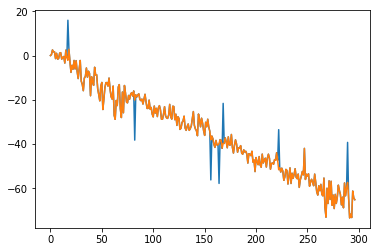

In [34]:
plt.plot(data_imported["time-series with UE"][0])
plt.plot(data_imported["time-series"][0])

In [52]:
thresholds = [0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.9]

In [63]:
thresh = 0.75
windows = [3, 5, 7, 10, 12, 15, 20]
window = 10

In [64]:
# for window in windows:
for thresh in thresholds:
    print(interpolation_method, ' threshold: ', thresh, ' window: ', window)

    mov_average = MovAverage(thresh, window)

    start = timer()
    metrics, results_naive_all = Testing(mov_average.fun, data, ans, prints=False)
    end = timer()
    print(end - start)

    TPall = metrics.TP.sum()
    FPall = metrics.FP.sum()
    FNall = metrics.FN.sum()
    TNall = metrics.TN.sum()

    FPR = FPall / (FPall + TNall) * 100
    FNR = FNall / (FNall + TPall) * 100
    Sall = TPall / (TPall + FNall)
    Pall = TPall / (TPall + FPall)

    F1score = 2 * (Pall * Sall) / (Pall + Sall)

    print()

    with open('MA_results_changing_threshold_basic_sim_.txt', 'a') as f:
        f.write("\n" +str(interpolation_method)+ " | " + str(thresh) + " | window: " + str(window))
        f.write('\nRecall (all):\t\t' + str(Sall))
        f.write('\nPrecision (all):\t' + str(Pall))
        f.write('\nF1score: ' + str(F1score))
        f.write('\nTrue positives: {}, False positives: {}, False negatives: {}, True negatives: {}\n'.format(TPall, FPall, FNall, TNall))
        f.write('\n ----------------------------------------------- \n')
        f.close()

    print('Recall (all):\t\t', Sall)
    print('Precision (all):\t', Pall)
    print('F1 score = ', F1score)
    print('True positives: {}, False positives: {}, False negatives: {}, True negatives: {} \n'.format(TPall, FPall, FNall, TNall))

original  threshold:  0.6  window:  10
36.38952490099473

Recall (all):		 0.9295296734904833
Precision (all):	 0.5956941244239631
F1 score =  0.7260775313539461
True positives: 41365, False positives: 28075, False negatives: 3136, True negatives: 2897424 

original  threshold:  0.65  window:  10
33.57148496901209

Recall (all):		 0.9146985461000876
Precision (all):	 0.7055815565955972
F1 score =  0.7966454971572838
True positives: 40705, False positives: 16985, False negatives: 3796, True negatives: 2908514 

original  threshold:  0.7  window:  10
34.24738452400197

Recall (all):		 0.8933282398148357
Precision (all):	 0.7977444665181707
F1 score =  0.8428350329679649
True positives: 39754, False positives: 10079, False negatives: 4747, True negatives: 2915420 

original  threshold:  0.75  window:  10
33.43097442299768

Recall (all):		 0.8610143592278825
Precision (all):	 0.8665445416921094
F1 score =  0.8637705989765323
True positives: 38316, False positives: 5901, False negatives: 618